In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
import re

# TODO: Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
img = cv2.imread("C:/Users/clcas/ttb/exclude/IMG_5272.jpg", cv2.IMREAD_COLOR)

if img is None:
    print("Error loading image")

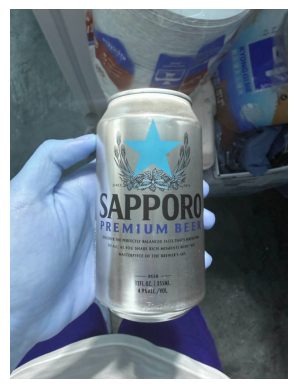

In [4]:
plt.imshow(img)
plt.axis("off")
plt.show()

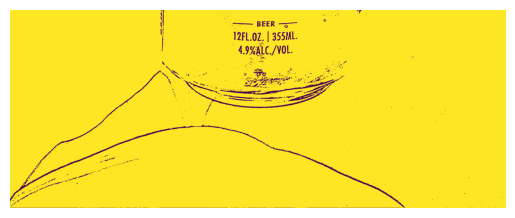

In [6]:
(h, w) = img.shape[:2]
crop_start_y = int(h * 0.70)
cropped_image = img[crop_start_y:h, :]

gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.medianBlur(gray, 3)
cleaned_image = cv2.adaptiveThreshold(
        blurred, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        31, 
        7
    )

plt.imshow(cleaned_image)
plt.axis("off")
plt.show()

In [9]:
pil_image = Image.fromarray(cleaned_image)
custom_config = r'--psm 11'
extracted_text = pytesseract.image_to_string(pil_image, config=custom_config)
print("Extracted Text:")
print(extracted_text)

Extracted Text:
%

——. BEER —>—

i

12FL.OZ, | 355IAL.

‘SKALC NOL

aN

.

fj

ww

bed

Se.

ee

Te er

ore ae

ws

—

ie

a



In [10]:
cleaned_text = extracted_text.replace('\n', ' ').strip()
print("Cleaned Text:")
print(cleaned_text)

Cleaned Text:
%  ——. BEER —>—  i  12FL.OZ, | 355IAL.  ‘SKALC NOL  aN  .  fj  ww  bed  Se.  ee  Te er  ore ae  ws  —  ie  a


In [13]:
fl_oz_match = re.search(r'(\d+)\s*FL\.?OZ', cleaned_text, re.IGNORECASE)
if fl_oz_match:
    volume_fl_oz = int(fl_oz_match.group(1))

# Pattern 2: Find X ML or X IAL (as '355IAL' is the common OCR error for 355ML)
ml_match = re.search(r'(\d{3,})\s*(ML|IAL)', cleaned_text, re.IGNORECASE)
if ml_match:
    volume_ml = int(ml_match.group(1))
    
print(f"Volume in FL OZ: {volume_fl_oz}" if 'volume_fl_oz' in locals() else "No FL OZ volume found.")
print(f"Volume in ML: {volume_ml}" if 'volume_ml' in locals() else "No ML volume found.")

Volume in FL OZ: 12
Volume in ML: 355
